<a href="https://colab.research.google.com/github/NguyenVanVuong613/YOLOv11/blob/main/YOLOv11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/football_data/train/images/573e61_0_mp4-0064_jpg.rf.7c6aa45ca3f376cec86db232e00495c0.jpg  
  inflating: data/football_data/train/images/573e61_0_mp4-0064_jpg.rf.8423ca2acc15502916e884a5d18f0a8d.jpg  
  inflating: data/football_data/train/images/573e61_0_mp4-0066_jpg.rf.4cbe8c20b656e82c0a2049a88c078699.jpg  
  inflating: data/football_data/train/images/573e61_0_mp4-0066_jpg.rf.dc3873365696073df6a763e878339e31.jpg  
  inflating: data/football_data/train/images/573e61_0_mp4-0066_jpg.rf.e0dfaabb62d797d163fdaabe2bfcefb8.jpg  
  inflating: data/football_data/train/images/573e61_0_mp4-0067_jpg.rf.3535140563ebcfdb1c43a5d937c0ef2d.jpg  
  inflating: data/football_data/train/images/573e61_0_mp4-0067_jpg.rf.bfb50706a8301921cf44ac31c45d1d95.jpg  
  inflating: data/football_data/train/images/573e61_0_mp4-0067_jpg.rf.c16f3bd4bf65619ba6e3e797f0b72b5f.jpg  
  inflating: data/football_data/train/images/573e61_0_mp4-0068_jpg.rf.692c35b

In [ ]:
%rm -rf /content/valid

In [2]:
!nvidia-smi

Sun Dec  1 06:01:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.0/112.6 GB disk)


In [4]:
!pip install opencv-python matplotlib


In [5]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available.")
else:
    device = torch.device("cpu")
    print("GPU is not available.")


GPU is available.


In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)
model.to(device)

# Train the model
results = model.train(data="/content/data/football_data/data.yaml", epochs=100, imgsz=640, batch=64)

100%|██████████| 5.35M/5.35M [00:00<00:00, 293MB/s]


engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data/football_data/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=Fa

100%|██████████| 755k/755k [00:00<00:00, 51.9MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/data/football_data/train/labels... 3440 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3440/3440 [00:01<00:00, 1778.74it/s]


train: New cache created: /content/data/football_data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/data/football_data/valid/labels... 327 images, 0 backgrounds, 0 corrupt: 100%|██████████| 327/327 [00:00<00:00, 1118.29it/s]


val: New cache created: /content/data/football_data/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      11.6G      1.779      3.067     0.9325        227        640: 100%|██████████| 54/54 [01:05<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.64s/it]

                   all        327       1759   0.000277    0.00848    0.00113   0.000398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.6G       1.57      1.629     0.8861        455        640: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]

                   all        327       1759      0.934     0.0891      0.288      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.5G      1.529      1.371     0.8782        346        640: 100%|██████████| 54/54 [01:03<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]

                   all        327       1759       0.53      0.342      0.401       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.7G      1.544       1.22     0.8813        457        640: 100%|██████████| 54/54 [01:03<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]

                   all        327       1759      0.475      0.278       0.28      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.92G      1.491      1.041      0.877        437        640: 100%|██████████| 54/54 [01:03<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]

                   all        327       1759      0.598      0.431      0.455      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.9G      1.436     0.9409     0.8698        376        640: 100%|██████████| 54/54 [01:02<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]

                   all        327       1759      0.705      0.562       0.62      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.76G      1.424     0.9082     0.8658        435        640: 100%|██████████| 54/54 [01:02<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.71s/it]

                   all        327       1759      0.736      0.615      0.676      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.5G       1.37      0.847     0.8552        289        640: 100%|██████████| 54/54 [01:01<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.72s/it]

                   all        327       1759      0.689       0.67      0.686       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.3G      1.366      0.816     0.8557        450        640: 100%|██████████| 54/54 [01:00<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.85s/it]

                   all        327       1759      0.777      0.671      0.735      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.4G      1.358     0.8344      0.858        337        640: 100%|██████████| 54/54 [01:01<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  2.00s/it]

                   all        327       1759      0.766       0.69      0.757      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.8G      1.355     0.7948     0.8522        431        640: 100%|██████████| 54/54 [01:00<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.09s/it]

                   all        327       1759      0.739       0.76      0.774      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      12.2G      1.316     0.7564     0.8509        454        640: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.93s/it]

                   all        327       1759      0.695      0.713      0.756      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100        11G      1.309     0.7562     0.8479        402        640: 100%|██████████| 54/54 [01:00<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.15s/it]

                   all        327       1759      0.793      0.737      0.792      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.9G      1.319     0.7443     0.8512        330        640: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.96s/it]

                   all        327       1759      0.831      0.754      0.815      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.1G      1.306     0.7145     0.8445        437        640: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]

                   all        327       1759      0.853      0.692       0.79       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.8G      1.285     0.7216     0.8451        429        640: 100%|██████████| 54/54 [01:02<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]

                   all        327       1759      0.819       0.78      0.824      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.1G      1.274      0.716     0.8424        395        640: 100%|██████████| 54/54 [01:01<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.45s/it]

                   all        327       1759      0.813      0.746      0.815      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.3G       1.25     0.6953     0.8441        329        640: 100%|██████████| 54/54 [01:02<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]

                   all        327       1759      0.781      0.724      0.796      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      12.1G      1.273     0.7133     0.8427        356        640: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]

                   all        327       1759      0.617      0.636      0.632      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.6G      1.273     0.7119     0.8417        476        640: 100%|██████████| 54/54 [01:02<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]

                   all        327       1759      0.782      0.755      0.811      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.4G      1.261     0.6888     0.8415        496        640: 100%|██████████| 54/54 [01:02<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]

                   all        327       1759      0.812      0.752      0.822      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.4G       1.27     0.6924     0.8397        444        640: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]

                   all        327       1759      0.851      0.726      0.816      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      12.1G      1.237     0.6697     0.8394        262        640: 100%|██████████| 54/54 [01:02<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]

                   all        327       1759      0.834      0.714      0.805      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100        10G      1.227      0.665     0.8363        457        640: 100%|██████████| 54/54 [01:03<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]

                   all        327       1759      0.854      0.764       0.84      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100        11G      1.225     0.6528     0.8375        351        640: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]

                   all        327       1759      0.824      0.814      0.865      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        11G      1.231     0.6601     0.8375        389        640: 100%|██████████| 54/54 [01:02<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]

                   all        327       1759      0.745      0.548      0.624      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.5G      1.208      0.638     0.8328        517        640: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]

                   all        327       1759      0.843      0.799      0.856       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.6G      1.201     0.6334     0.8353        312        640: 100%|██████████| 54/54 [01:02<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]

                   all        327       1759      0.845      0.808      0.866      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100        11G      1.203     0.6346     0.8324        344        640: 100%|██████████| 54/54 [01:04<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]

                   all        327       1759      0.886      0.781      0.871      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.8G      1.208     0.6267     0.8339        433        640: 100%|██████████| 54/54 [01:03<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]

                   all        327       1759      0.867       0.79       0.86      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100        12G      1.186     0.6204     0.8304        303        640: 100%|██████████| 54/54 [01:02<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]

                   all        327       1759      0.832      0.786      0.852      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.6G       1.19     0.6273     0.8322        376        640: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]

                   all        327       1759      0.887      0.791      0.877      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.2G      1.178     0.6228     0.8324        433        640: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.95s/it]

                   all        327       1759      0.848      0.811      0.871      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.9G      1.178     0.6118     0.8315        452        640: 100%|██████████| 54/54 [00:59<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.01s/it]

                   all        327       1759      0.854      0.762      0.852      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100        11G      1.171     0.6145     0.8285        370        640: 100%|██████████| 54/54 [00:59<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.91s/it]

                   all        327       1759      0.888      0.793      0.881      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.6G      1.195     0.6247     0.8306        429        640: 100%|██████████| 54/54 [01:00<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.89s/it]

                   all        327       1759      0.839      0.814      0.863       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.93G      1.194     0.6133     0.8294        399        640: 100%|██████████| 54/54 [01:00<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.09s/it]

                   all        327       1759      0.898      0.802      0.885       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        11G      1.171     0.6007     0.8302        351        640: 100%|██████████| 54/54 [01:01<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.03s/it]

                   all        327       1759        0.9      0.814      0.895      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.6G      1.161     0.5939     0.8274        481        640: 100%|██████████| 54/54 [01:00<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.04s/it]

                   all        327       1759      0.848      0.804       0.88      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100        11G      1.156     0.5951     0.8278        461        640: 100%|██████████| 54/54 [00:59<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.15s/it]

                   all        327       1759      0.869      0.825      0.887       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      12.8G      1.149     0.5866     0.8258        502        640: 100%|██████████| 54/54 [00:59<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.11s/it]

                   all        327       1759      0.887        0.8      0.883      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.5G      1.159     0.5961     0.8261        445        640: 100%|██████████| 54/54 [00:59<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.04s/it]

                   all        327       1759      0.878      0.817      0.875      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.3G      1.157     0.5947     0.8291        489        640: 100%|██████████| 54/54 [01:02<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.80s/it]

                   all        327       1759      0.829      0.804      0.847      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.7G      1.151     0.5919     0.8263        375        640: 100%|██████████| 54/54 [00:59<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.07s/it]

                   all        327       1759      0.852      0.831      0.891      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      13.6G      1.152     0.5921     0.8238        519        640: 100%|██████████| 54/54 [00:59<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.10s/it]

                   all        327       1759      0.846       0.83      0.876      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.3G       1.15     0.5859     0.8256        549        640: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.02s/it]

                   all        327       1759      0.882      0.844      0.893       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      12.5G      1.134     0.5793     0.8254        331        640: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.89s/it]

                   all        327       1759        0.9      0.821      0.891      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.2G      1.118     0.5715     0.8226        323        640: 100%|██████████| 54/54 [01:00<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.89s/it]

                   all        327       1759      0.932      0.801      0.902      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.1G      1.142     0.5883      0.824        562        640: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.74s/it]

                   all        327       1759      0.925      0.833      0.899      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.76G      1.136      0.571     0.8226        462        640: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.69s/it]

                   all        327       1759      0.894      0.807      0.877      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.3G      1.131     0.5714     0.8229        416        640: 100%|██████████| 54/54 [01:00<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.81s/it]

                   all        327       1759      0.923      0.842      0.911      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.5G      1.119     0.5648     0.8221        367        640: 100%|██████████| 54/54 [01:01<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.02s/it]

                   all        327       1759       0.89      0.842      0.905      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.9G      1.123     0.5649     0.8207        487        640: 100%|██████████| 54/54 [01:00<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.91s/it]

                   all        327       1759      0.876      0.852        0.9      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.1G      1.103     0.5571     0.8218        406        640: 100%|██████████| 54/54 [01:01<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.83s/it]

                   all        327       1759       0.91      0.838      0.901       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.3G       1.13     0.5654     0.8208        547        640: 100%|██████████| 54/54 [00:59<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.94s/it]

                   all        327       1759      0.896      0.838      0.898      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.8G      1.122     0.5587     0.8209        504        640: 100%|██████████| 54/54 [01:00<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.01s/it]

                   all        327       1759      0.849      0.788       0.86      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.9G      1.098     0.5544     0.8207        496        640: 100%|██████████| 54/54 [01:00<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.13s/it]

                   all        327       1759      0.907      0.849      0.907      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.6G      1.104     0.5533     0.8206        239        640: 100%|██████████| 54/54 [01:00<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.10s/it]

                   all        327       1759       0.92      0.851      0.902      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      10.5G      1.097     0.5508     0.8199        535        640: 100%|██████████| 54/54 [00:59<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.88s/it]

                   all        327       1759       0.93      0.818      0.907      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      11.3G      1.098     0.5498     0.8182        390        640: 100%|██████████| 54/54 [01:00<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.89s/it]

                   all        327       1759      0.916      0.853      0.916      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.4G      1.086     0.5403      0.821        342        640: 100%|██████████| 54/54 [01:01<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]

                   all        327       1759      0.904      0.868      0.916      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      10.6G      1.098     0.5506     0.8197        338        640: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]

                   all        327       1759      0.925      0.831      0.909      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.3G      1.094     0.5467     0.8178        386        640: 100%|██████████| 54/54 [01:00<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.84s/it]

                   all        327       1759       0.93      0.847      0.916      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.7G      1.088     0.5433     0.8184        461        640: 100%|██████████| 54/54 [01:01<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.64s/it]

                   all        327       1759      0.915      0.865      0.921      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.7G      1.077     0.5367     0.8167        581        640: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.78s/it]

                   all        327       1759      0.922       0.84      0.905      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100        12G      1.082     0.5342     0.8163        359        640: 100%|██████████| 54/54 [01:02<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]

                   all        327       1759      0.938      0.864      0.925      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.6G      1.082     0.5421     0.8158        356        640: 100%|██████████| 54/54 [01:03<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]

                   all        327       1759       0.92      0.857      0.919      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.4G      1.076     0.5335      0.817        328        640: 100%|██████████| 54/54 [01:02<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]

                   all        327       1759      0.907      0.873       0.92      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.8G      1.076     0.5351      0.817        428        640: 100%|██████████| 54/54 [01:02<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]

                   all        327       1759      0.932      0.863      0.919      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      10.4G      1.061     0.5274     0.8144        418        640: 100%|██████████| 54/54 [01:01<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]

                   all        327       1759      0.949      0.843      0.922      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.5G       1.07     0.5278     0.8149        518        640: 100%|██████████| 54/54 [01:03<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]

                   all        327       1759      0.932      0.858      0.923      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      10.2G      1.065     0.5248     0.8151        468        640: 100%|██████████| 54/54 [01:04<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]

                   all        327       1759      0.909      0.873      0.918      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.9G      1.072     0.5278      0.814        433        640: 100%|██████████| 54/54 [01:03<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

                   all        327       1759      0.909      0.874      0.922      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100        11G      1.046     0.5129     0.8125        334        640: 100%|██████████| 54/54 [01:03<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]

                   all        327       1759      0.923      0.872      0.918      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      10.3G      1.063     0.5274     0.8133        395        640: 100%|██████████| 54/54 [01:03<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]

                   all        327       1759       0.93      0.837       0.92        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.9G      1.048     0.5146     0.8118        455        640: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]

                   all        327       1759       0.93      0.853      0.923      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.9G      1.049      0.514      0.814        469        640: 100%|██████████| 54/54 [01:02<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]

                   all        327       1759      0.904      0.891      0.918      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      12.1G      1.055     0.5138     0.8132        459        640: 100%|██████████| 54/54 [01:02<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]

                   all        327       1759      0.925      0.862      0.925      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.3G      1.056     0.5171     0.8136        541        640: 100%|██████████| 54/54 [01:03<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]

                   all        327       1759      0.914      0.879      0.921       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      10.6G      1.054     0.5086     0.8126        331        640: 100%|██████████| 54/54 [01:02<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]

                   all        327       1759      0.935      0.848      0.916      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.3G       1.05     0.5136     0.8126        389        640: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

                   all        327       1759      0.942      0.848      0.924      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.5G       1.04     0.5077     0.8108        364        640: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]

                   all        327       1759      0.913      0.877      0.925      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      10.7G      1.041      0.507     0.8111        367        640: 100%|██████████| 54/54 [01:02<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]

                   all        327       1759      0.948      0.832       0.92      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100        10G      1.044     0.5045     0.8136        470        640: 100%|██████████| 54/54 [01:03<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]

                   all        327       1759      0.916      0.859      0.924      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      10.2G      1.027        0.5     0.8099        488        640: 100%|██████████| 54/54 [01:03<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]

                   all        327       1759      0.942      0.854      0.926      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100        10G      1.025     0.4959     0.8106        446        640: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]

                   all        327       1759      0.912      0.871      0.921      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.93G      1.035      0.504     0.8114        482        640: 100%|██████████| 54/54 [01:04<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]

                   all        327       1759      0.926      0.866      0.925      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      12.2G      1.019     0.4974     0.8097        415        640: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]

                   all        327       1759      0.928      0.863      0.921      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.3G      1.034        0.5     0.8086        357        640: 100%|██████████| 54/54 [01:04<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all        327       1759      0.926       0.88       0.93      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.5G      1.023     0.4956      0.812        344        640: 100%|██████████| 54/54 [01:04<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]

                   all        327       1759      0.919      0.881      0.925      0.614


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       9.1G     0.9692     0.4771     0.8135        280        640: 100%|██████████| 54/54 [01:06<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]

                   all        327       1759      0.933      0.864      0.923      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.09G     0.9635     0.4712     0.8131        283        640: 100%|██████████| 54/54 [01:00<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]

                   all        327       1759      0.937      0.857      0.922      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       9.1G     0.9508     0.4662     0.8135        262        640: 100%|██████████| 54/54 [01:02<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]

                   all        327       1759      0.918       0.88      0.922      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.11G     0.9505     0.4662     0.8127        171        640: 100%|██████████| 54/54 [00:59<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.69s/it]

                   all        327       1759      0.937      0.861      0.925      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.09G     0.9448     0.4604     0.8112        227        640: 100%|██████████| 54/54 [01:00<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.10s/it]

                   all        327       1759      0.925      0.865      0.923      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       9.1G     0.9345     0.4563     0.8102        376        640: 100%|██████████| 54/54 [01:00<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]

                   all        327       1759      0.938      0.866      0.926      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.09G     0.9389      0.459     0.8102        189        640: 100%|██████████| 54/54 [01:00<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all        327       1759      0.936      0.868      0.921      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       9.1G     0.9409     0.4568     0.8099        304        640: 100%|██████████| 54/54 [01:02<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]

                   all        327       1759      0.944      0.865      0.925      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       9.1G     0.9302     0.4536     0.8076        342        640: 100%|██████████| 54/54 [00:59<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.20s/it]

                   all        327       1759      0.939      0.863      0.924      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.09G     0.9314     0.4522     0.8074        301        640: 100%|██████████| 54/54 [00:59<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.82s/it]

                   all        327       1759      0.934      0.871      0.923      0.621



100 epochs completed in 1.901 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.79s/it]


                   all        327       1759      0.926      0.865      0.925      0.624
                  ball        318        319      0.884      0.715      0.809      0.493
            goalkeeper         39         41      0.988      0.878      0.959      0.608
                player         63       1250      0.961      0.967       0.99      0.741
               referee         63        149      0.872      0.899      0.942      0.654
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train


In [17]:
model.info()

YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


(238, 2582932, 0, 6.316236799999999)

In [8]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [9]:
!zip -r /content/trained.zip /content/runs/detect/train

  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/train_batch4861.jpg (deflated 3%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 2%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 7%)
  adding: content/runs/detect/train/labels.jpg (deflated 26%)
  adding: content/runs/detect/train/train_batch4862.jpg (deflated 8%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 7%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 1%)
  adding: content/runs/detect/train/R_curve.png (deflated 9%)
  adding: content/runs/detect/train/P_curve.png (deflated 13%)
  adding: content/runs/detect/train/PR_curve.png (deflated 13%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 6%)
  adding: content/runs/detect/train/results.png (deflated 9%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 7%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/run

In [10]:
!gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
!gdown -O "08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
!gdown -O "573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /content/0bfacc_0.mp4
100% 19.9M/19.9M [00:00<00:00, 28.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: /content/2e57b9_0.mp4
100% 21.1M/21.1M [00:00<00:00, 59.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-
To: /content/08fd33_0.mp4
100% 19.9M/19.9M [00:00<00:00, 29.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU
To: /content/573e61_0.mp4
100% 18.9M/18.9M [00:00<00:00, 32.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 82.3MB/s]


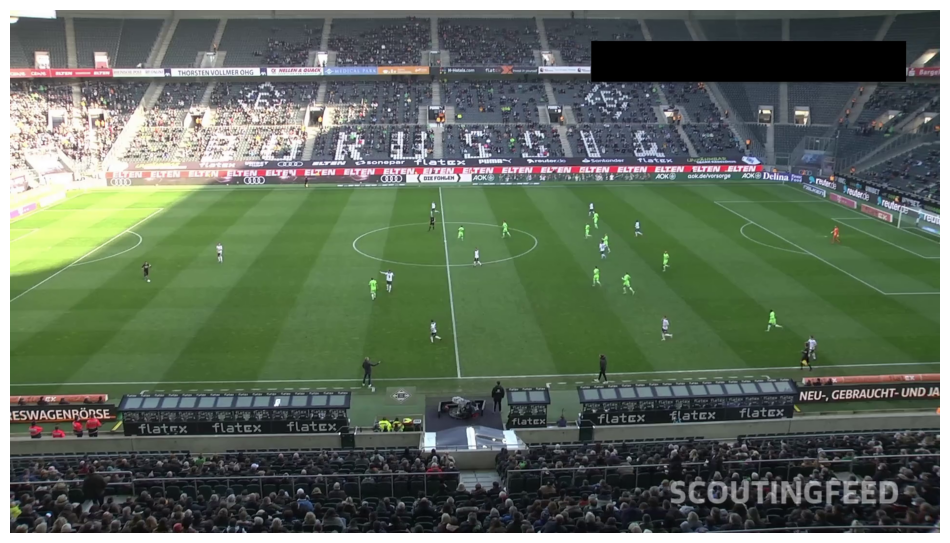

In [11]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/08fd33_0.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)

In [12]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Define path to video file
source = "/content/08fd33_0.mp4"

# Run inference on the source
results = model(source, stream=True)


0: 384x640 21 players, 3 referees, 47.0ms
Speed: 2.5ms preprocess, 47.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 3 referees, 15.9ms
Speed: 3.0ms preprocess, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3 referees, 15.1ms
Speed: 3.7ms preprocess, 15.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 12.4ms
Speed: 3.4ms preprocess, 12.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 10.2ms
Speed: 2.9ms preprocess, 10.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 11.0ms
Speed: 3.2ms preprocess, 11.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 12.9ms
Speed: 3.4ms preprocess, 12.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee

ValueError: num must be an integer with 1 <= num <= 12, not 13

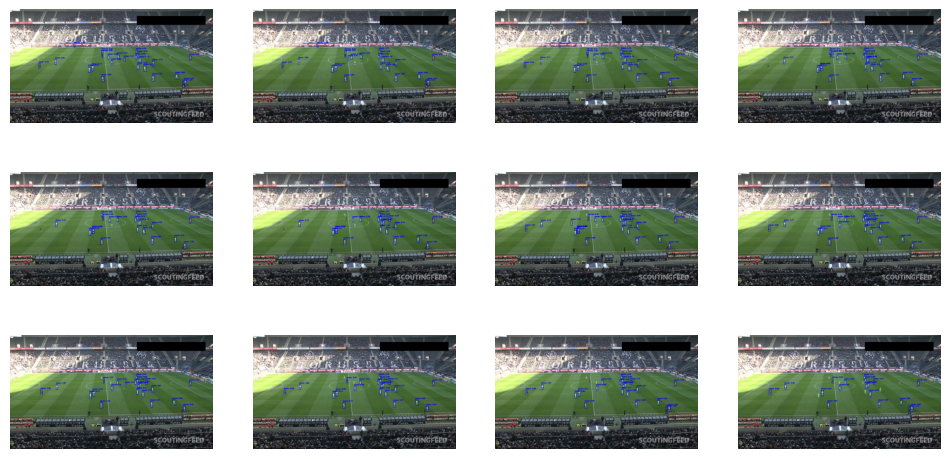

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Define the video source
SOURCE_VIDEO_PATH = "/content/08fd33_0.mp4"

# Load your YOLO model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Replace with your model path if needed

# Create a generator for video frames
frame_generator = cv2.VideoCapture(SOURCE_VIDEO_PATH)

# List to store annotated frames
annotated_frames = []

while True:
    ret, frame = frame_generator.read()
    if not ret:
        break

    # Perform inference on the current frame
    result = model(frame)  # This will return the results directly

    # Extract the boxes and classes from the result
    boxes = result[0].boxes
    detections = boxes.xyxy.cpu().numpy()  # Get bounding boxes in xyxy format
    confidences = boxes.conf.cpu().numpy()  # Get confidence scores
    class_ids = boxes.cls.cpu().numpy().astype(int)  # Get class IDs

    # Annotate the frame
    for box, confidence, class_id in zip(detections, confidences, class_ids):
        x1, y1, x2, y2 = box
        label = f"{model.names[class_id]}: {confidence:.2f}"
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(frame, label, (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    annotated_frames.append(frame)

# Release the video capture
frame_generator.release()

# Plot the annotated frames using Matplotlib
plt.figure(figsize=(12, 6))
for i, annotated_frame in enumerate(annotated_frames):
    plt.subplot(3, 4, i+1)  # Adjust number of subplots based on frames
    plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.tight_layout()
plt.show()


In [14]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Define the video source
SOURCE_VIDEO_PATH = "/content/08fd33_0.mp4"

# Load your YOLO model
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # Replace with your model path if needed

# Create a generator for video frames
frame_generator = cv2.VideoCapture(SOURCE_VIDEO_PATH)

# Read the first frame
ret, frame = frame_generator.read()
if not ret:
    print("Failed to read the first frame.")
    frame_generator.release()
    exit()

# Perform inference on the first frame
result = model(frame)  # This will return the results directly

# Extract the boxes and classes from the result
boxes = result[0].boxes
detections = boxes.xyxy.cpu().numpy()  # Get bounding boxes in xyxy format
confidences = boxes.conf.cpu().numpy()  # Get confidence scores
class_ids = boxes.cls.cpu().numpy().astype(int)  # Get class IDs

# Annotate the frame
for box, confidence, class_id in zip(detections, confidences, class_ids):
    x1, y1, x2, y2 = box
    label = f"{model.names[class_id]}: {confidence:.2f}"
    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
    cv2.putText(frame, label, (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Release the video capture
frame_generator.release()

# Plot the annotated first frame using Matplotlib
plt.figure(figsize=(14, 12))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Annotated First Frame')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train2/weights/best.pt'

In [ ]:
print(result)  # Add this line to inspect the output structure


[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'ball', 1: 'goalkeeper', 2: 'player', 3: 'referee'}
obb: None
orig_img: array([[[242, 252, 251],
        [242, 252, 251],
        [242, 252, 251],
        ...,
        [ 71,  74,  64],
        [ 72,  75,  65],
        [ 72,  75,  65]],

       [[242, 252, 251],
        [242, 252, 251],
        [242, 252, 251],
        ...,
        [ 71,  74,  64],
        [ 71,  74,  64],
        [ 71,  74,  64]],

       [[238, 253, 251],
        [238, 253, 251],
        [238, 253, 251],
        ...,
        [ 66,  69,  59],
        [ 65,  68,  58],
        [ 64,  67,  57]],

       ...,

       [[ 23,  26,  26],
        [ 24,  27,  27],
        [ 28,  31,  31],
        ...,
        [114, 119, 117],
        [100, 110, 107],
        [ 95, 105, 102]],

       [[ 25,  25,  25],
        [ 29,  29,  29],
        [ 31,  31,  31],
        ...,
        [114, 117, 1

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="**********")
project = rf.workspace("vuong-oysnc").project("football_analys")
version = project.version(1)
dataset = version.download("yolov11")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/train/")